In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
A = np.array([[-0.717, -23.827], [114.483, -640.393]])
Y0 = np.array([1.0, 2.0])
B = np.array([[-1.905, -0.015], [-0.13, -2.295]])
Z0 = np.array([1.0, 0.0])

t0, t1 = 0.0, 1.0
h = 0.01

In [3]:
def euler(A, Y0, t0, t1, h):
    """
    Функция, решающяя дифференциальное уравнение через метод Эйлера
    """
    t_arr = np.arange(t0, t1 + h, h)
    y_arr = np.zeros((len(t_arr), len(Y0)))
    y_arr[0] = Y0

    for i in range(0, len(t_arr) - 1):  # вычисляем y в точках разбиения
        y_arr[i + 1] = y_arr[i] + h * (np.dot(A, y_arr[i]))
    return t_arr, y_arr

In [4]:
t_y, y = euler(A, Y0, t0, t1, h)
t_z, z = euler(B, Z0, t0, t1, h)

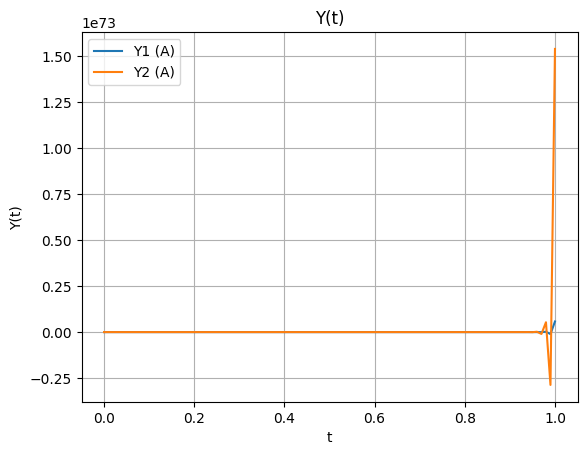

In [5]:
plt.plot(t_y, y[:, 0], label='Y1 (A)')
plt.plot(t_y, y[:, 1], label='Y2 (A)')
plt.title('Y(t)')
plt.xlabel('t')
plt.ylabel('Y(t)')
plt.legend()
plt.grid(True)
plt.show()

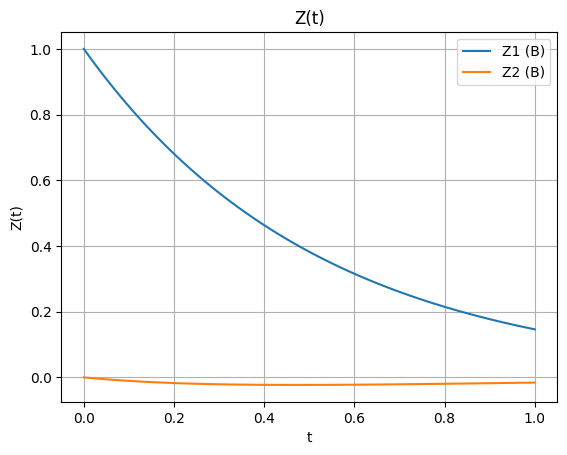

In [6]:
plt.plot(t_z, z[:, 0], label='Z1 (B)')
plt.plot(t_z, z[:, 1], label='Z2 (B)')
plt.title('Z(t)')
plt.xlabel('t')
plt.ylabel('Z(t)')
plt.legend()
plt.grid(True)
plt.show()

In [7]:
def is_stability(A, h):
    """
    Функция для определя является ли задача Коши устойчивой
    """
    lambdas = np.linalg.eigvals(A)
    re_of_lambdas = np.real(lambdas)
    max_lambda = np.abs(re_of_lambdas).max()
    return h < (2 / max_lambda)

In [8]:
print(f'Явный метод Эйлера устойчив для Y? {is_stability(A, h)}')
print(f'Явный метод Эйлера устойчив для Z? {is_stability(B, h)}')

Явный метод Эйлера устойчив для Y? False
Явный метод Эйлера устойчив для Z? True


In [11]:
def is_stiff(A):
    """
    Функция для определения является ли задача жесткой
    Определение жесткости со страницы 239 учебника (формула 14.130)
    """
    lambdas = np.linalg.eigvals(A)
    re_of_lambdas = np.real(lambdas)
    s = np.abs(re_of_lambdas).max() / np.abs(re_of_lambdas).min()
    return s

In [12]:
print(f'Коэффициентом жесткости задачи Y = {is_stiff(A)}')
print(f'Коэффициентом жесткости задачи Z = {is_stiff(B)}')

Коэффициентом жесткости задачи Y = 126.96253782159295
Коэффициентом жесткости задачи Z = 1.2104535921354116


Если коэффициент >> 1, то считаем задачу жесткой. В нашем случае жесткой является задача Y.

In [13]:
def find_h(A, h):
    """
    Бинарый поиск для поиска наибольшего h, при котором явный метод Эйлера будет устойчив.
    """
    left_h, right_h = 0, h
    while right_h - left_h > 1e-6:
        middle_h = (left_h + right_h) / 2
        if is_stability(A, middle_h):
            left_h = middle_h
        else:
            right_h = middle_h
    return left_h

In [14]:
print(f"При h = {find_h(A, h)} явный метод Эйлера будет устойчив")

При h = 0.0031439208984375003 явный метод Эйлера будет устойчив


In [15]:
# побредем теоретически
lambdas = np.linalg.eigvals(A)
re_of_lambdas = np.real(lambdas)
max_lambda = np.abs(re_of_lambdas).max()
max_h = 2 / max_lambda
print(f"При h = {max_h} явный метод Эйлера будет устойчив")

При h = 0.003144160406460898 явный метод Эйлера будет устойчив


In [22]:
def euler2(A, Y0, t0, t1, h):
    """
    Функция, решающяя дифференциальное уравнение через неявный метод Эйлера
    """
    t_arr = np.arange(t0, t1 + h, h)
    y_arr = np.zeros((len(t_arr), len(Y0)))
    y_arr[0] = Y0
    E = np.eye(len(A))

    for i in range(0, len(t_arr) - 1):  # вычисляем y в точках разбиения
        # y_arr[i + 1] = y_arr[i] + h * (np.dot(A, y_arr[i + 1]))
        y_arr[i + 1] = np.linalg.solve(E - h * A, y_arr[i])
    return t_arr, y_arr

In [23]:
t_y, y = euler2(A, Y0, t0, t1, h)

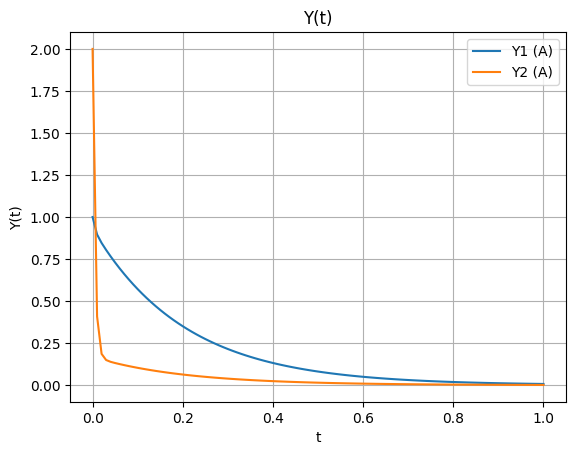

In [24]:
plt.plot(t_y, y[:, 0], label='Y1 (A)')
plt.plot(t_y, y[:, 1], label='Y2 (A)')
plt.title('Y(t)')
plt.xlabel('t')
plt.ylabel('Y(t)')
plt.legend()
plt.grid(True)
plt.show()

Подбор h для явного метода

In [25]:
for h_step in np.linspace(0.01, 0.00001, 100):
    t_y, y = euler(A, Y0, t0, t1, h=h_step)
    plt.plot(t_y, y[:, 0], label='Y1 (A)')
    plt.plot(t_y, y[:, 1], label='Y2 (A)')
    plt.title(f'Y(t), h={h_step:.6f}')
    plt.xlabel('t')
    plt.ylabel('Y(t)')
    plt.ylim(-4, 4)
    plt.legend()
    plt.grid(True)
    plt.savefig(f'for_gif/{h_step:.6f}.png')
    plt.close()

In [26]:
# создание gif

import imageio
import os

image_folder = 'for_gif'
gif_path = 'animation.gif'

images = []
for file_name in sorted(os.listdir(image_folder), reverse=True):
    if file_name.endswith('.png'):
        file_path = os.path.join(image_folder, file_name)
        images.append(imageio.imread(file_path))
        
imageio.mimsave(gif_path, images, duration=0.5)

/var/folders/hh/8pgkyy797f7941n9r5qyp10w0000gn/T/ipykernel_76549/856822187.py:13: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(file_path))


h = 0.001

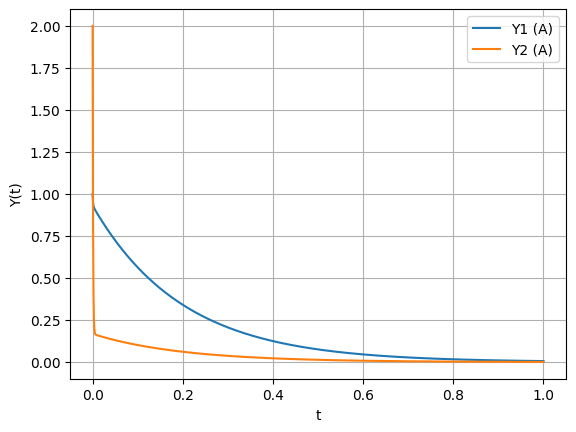

In [30]:
t_y, y = euler(A, Y0, t0, t1, h=0.001)
plt.plot(t_y, y[:, 0], label='Y1 (A)')
plt.plot(t_y, y[:, 1], label='Y2 (A)')
# plt.title(f'Y(t), h={h_step:.6f}')
plt.xlabel('t')
plt.ylabel('Y(t)')
plt.legend()
plt.grid(True)